<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.851 · Tipología y ciclo de vida de los datos · PRAC 2</p>
<p style="margin: 0; text-align:right;">2018-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PRAC 2: Limpieza.

En esta práctica se elabora un caso práctico orientado a aprender a identificar los datos relevantes para un proyecto analítico y usar las herramientas de integración, limpieza, validación y análisis de las mismas.

<ol start="1">
  <li>Descripción del dataset.</li>
  <li>Integración y selección de los datos de interés a analizar.</li>
  <li>Limpieza de los datos.</li>
  <li>Análisis de los datos.</li>
  <li>Representación de los resultados a partir de tablas y gráficas.</li>
  <li>Resolución del problema.</li>
</ol>

Importamos las librerías necesarias:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Desactivamos los warnings
import warnings
warnings.filterwarnings("ignore")

## Descripción del dataset

- Carga de los datos.

In [2]:
# Cargamos los datos
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

- Primer vistazo al conjunto de datos

In [3]:
# Mostramos información relativa al dataset train.
print('- \'train\' es del tipo: ',type(train))
print('- Las dimensiones de \'train\' son: ', train.shape)
print('- Las primeras 5 filas de \'train\' son:')
train.head(5)

- 'train' es del tipo:  <class 'pandas.core.frame.DataFrame'>
- Las dimensiones de 'train' son:  (891, 12)
- Las primeras 5 filas de 'train' son:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Mostramos información relativa al dataset test.
print('- \'test\' es del tipo: ',type(test))
print('- Las dimensiones de \'test\' son: ', test.shape)
print('- Las primeras 5 filas de \'test\' son:')
test.head(5)

- 'test' es del tipo:  <class 'pandas.core.frame.DataFrame'>
- Las dimensiones de 'test' son:  (418, 11)
- Las primeras 5 filas de 'test' son:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Como podemos observar, tenemos una dimensión menos en el conjunto de test, más concretamente se trata de la columna *Survived*.

- Unificar formatos

Con las dos cabeceras anteriores podemos ver que las diferentes dimensiones tienen el mismo formato en ambos conjuntos a fusionar. Por ejemplo, para la columna *Sex* tenemos que en ambos casos pone *male* para los hombres y *famale* para las mujeres en vez de *H* y *M* o algo por el estilo. Lo mismo pasa para el precio de los billetes, que se encuentran en la misma moneda. De no ser así, habría que unificar formatos al hacer la fusión, pero en este caso no existe ese problema.

- Descripción del origen de los datos

Los datos han sido descargados directamente del enlace que se muestra más abajo y que forma parte de una competición para la que se aporta además del conjunto de train y test un conjunto de datos llamado **gender_submission.csv** que no vamos a usar dado que sólo indica el formato en el que quiere la competición que demos respuesta a la pregunta que se realiza.

https://www.kaggle.com/c/titanic/data

- Descripción de las dimensiones

Las dimensiones que tiene nuestro conjunto de datos el siguiente:

**PassengerId**: Identificador del pasajero. Número entero incremental.

**Pclass**: Primera, segunda o tercera clase. Número entero.

**Name**: Nombre del pasajero.

**Sex**: Género del pasajero. Masculino / femenino.

**Age**: Edad del pasajero. Número con decimales.

**Sibsp**: Número de hermanos o cónyuges abordo del Titanic. Número entero.

**Parch**: Número de padres o hermanos abordo del Titanic. Número entero.

**Ticket**: Número del ticket. Char.

**Fare**: Tarifa del pase. Número con decimales.

**Cabin**: Número de la cabina. Char.

**Embarked**: Puerto de embarque, siendo C = Cherbourg, Q = Queenstown, S = Southampton. Char.

Además, tenemos una columna que hace referencia a los pasajeros que han sobrevivido, pero solo en el conjunto de train.

**Survival**: Indica mediante valores booleanos si el pasajero ha sobrevivido o no.

**NOTA**: Vamos a usar *PassengerId* como Primary key, pero para eso, vamos a asegurarnos de que realmente es un primary key y que no tiene valores repetidos.


- ¿Por qué es importante y qué pregunta/problema pretende responder?

Tener limpia esta base de datos da lugar a poder predecir los perfiles de pasajeros que pudieron sobrevivir mediante técnicas de minería. El objetivo es poder predecir si un cierto perfil sobreviviría en la catástrofe del titanic o no.

Además, aunque en la competición de Kaggle se suponga que se ha realizado adecuadamente la división del conjunto train y test, podemos comprobar que efectivamente la división en ambos conjuntos no esté sesgado y sea aleatoria.

## Integración y selección de los datos de interés a analizar.

- Integración -> Fusión de los datos.

In [5]:
# Dado que nos interesa limpiar los datos, los vamos a juntar en un único DataFrame.
frame = [train, test]
data = pd.concat(frame)

In [6]:
# Mostramos información relativa al dataset.
print('- \'data\' es del tipo: ',type(data))
print('- Las dimensiones de \'data\' son: ', data.shape)
print('- Las primeras 5 filas de \'data\' son:')
data.head(5)

- 'data' es del tipo:  <class 'pandas.core.frame.DataFrame'>
- Las dimensiones de 'data' son:  (1309, 12)
- Las primeras 5 filas de 'data' son:


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


- Integración -> Identificador único.

En éste apartado vamos a comprobar que tal y como parece, la dimensión PassengerID sea un identificador único:

In [9]:
copia_id = data['PassengerId'].tolist()
if len(set(copia_id)) == len(copia_id):
    respuesta_1 = True
else:
    respuesta_1 = False
print('¿Todos los valores de PassengerId son únicos? --> ', respuesta_1)
id_bueno = [i for  i in range(1,len(data) + 1)]
respuesta_2 = (copia_id == id_bueno)
print('¿Todos los valores de PassengerId son números crecientes sin espacios secuenciales? --> ', respuesta_2)

¿Todos los valores de PassengerId son únicos? -->  True
¿Todos los valores de PassengerId son números crecientes sin espacios secuenciales? -->  True


- Selección -> Filtrado.

En un principio no nos interesa realizar ningún tipo de filtrado por ningún valor o valores concretos de ninguna dimensión, de ser así, siempre existe la posibilidad de realizar dicha reducción en el procesamiento de los datos, sin ser necesaria su realización en esta etapa de preprocesado.

- Selección -> Nuevas variables.

In [10]:
# Atributo que dice si un pasajero tiene una cabina en el Titanic
data['Con_Cabina'] = data["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

# Atributo que especifica el tamaño total de la familia.
data['TamanioFamilia'] = data['SibSp'] + data['Parch'] + 1

# Atributo que especifica el título del pasajero.
def titulo(name):
    titulo = re.search(' ([A-Za-z]+)\.', name)
    if titulo:
        return titulo.group(1)
    return ""
## Aplicamos la función
data['Titulo'] = data['Name'].apply(titulo)
## Aglutinamos los títulos.
data['Titulo'] = data['Titulo'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Otros')
## Ya que nos ponemos a crear, vamos a hacerlo sin que dos clases iguales aparezcan distinto.
data['Titulo'] = data['Titulo'].replace(['Mlle','Ms'] , 'Miss')
data['Titulo'] = data['Titulo'].replace('Mme', 'Mrs')

# Visualizamos las nuevas columnas
data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Con_Cabina,TamanioFamilia,Titulo
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,2,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,2,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,1,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,2,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,1,Mr


- Selección -> Screening o exploración de los datos.

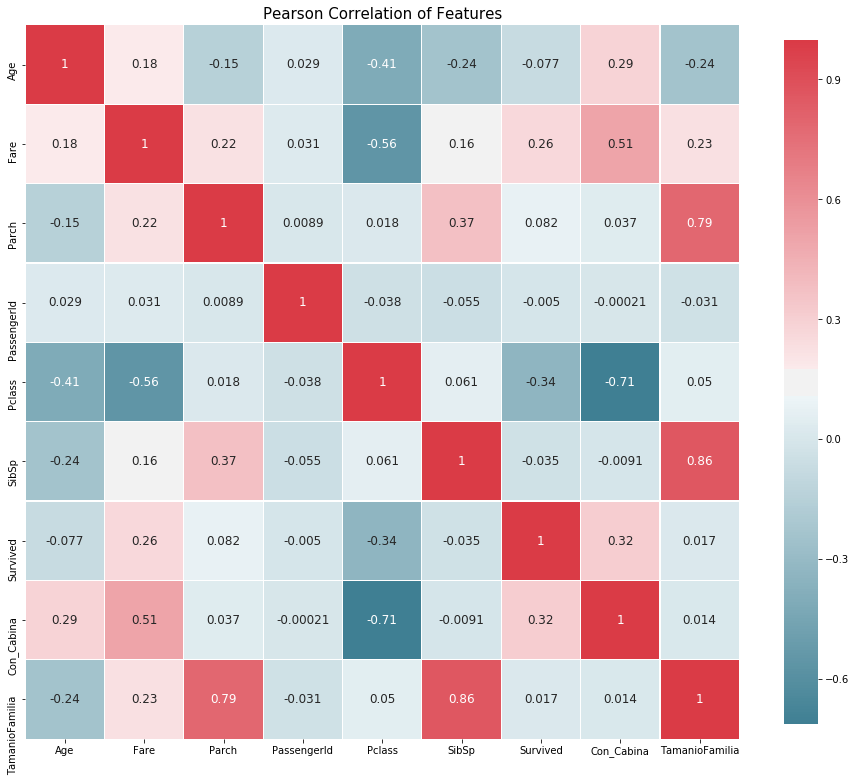

In [11]:
%matplotlib inline
# Visualización de correlación entre variables.
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(16, 14))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', size=15)

correlation_heatmap(data)

**NOTA**: Como podemos ver, en la visualización anterior solamente tenemos 9 dimensiones, de las cuales 3 las acabamos de añadir, y teniendo en cuenta que teníamos en un principio, antes de añadir las dimensiones 12 dimensiones, podemos llegar a la conclusión de que faltan 6 dimensiones que no aparecen. Podemos tratar de arreglarlo de la siguiente forma:

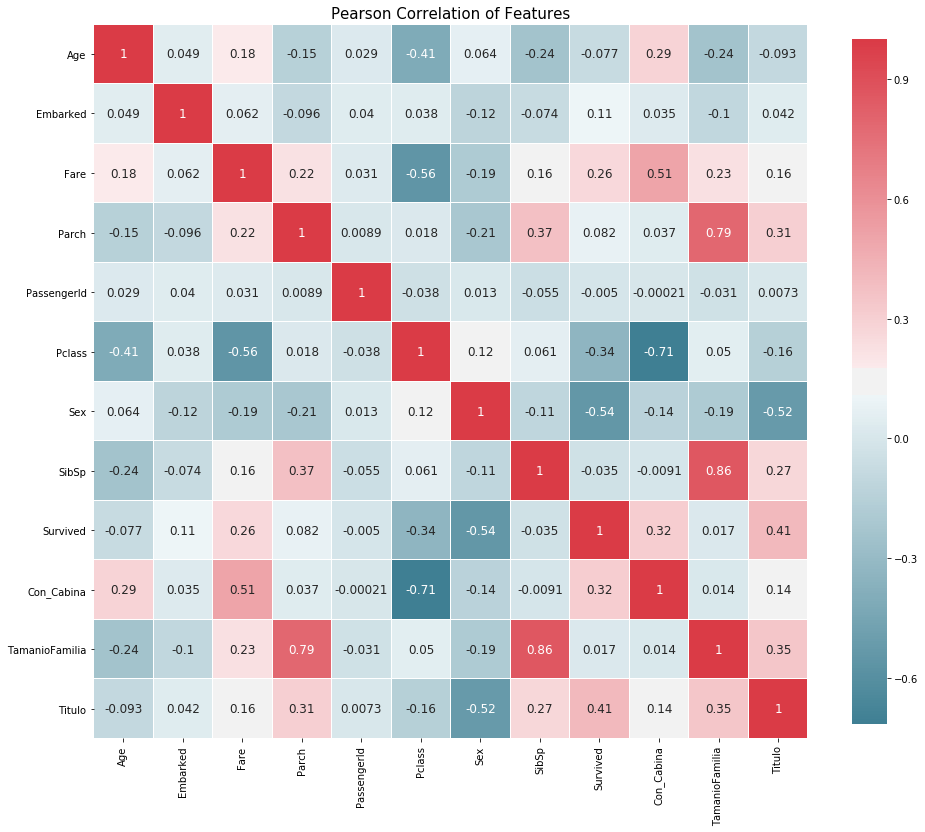

In [12]:
# Mapeo de la dimensión Sex
data['Sex'] = data['Sex'].map( {'female': 0, 'male': 1} )

# Mapeo de la dimensión titles
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Otros": 5}
data['Titulo'] = data['Titulo'].map(title_mapping)

# Mapeo de la dimensión Embarked
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

def mapeo_Fare_Age():
    # El objetivo de esta función es situar el código de mapeo aquí, pero que el mapeo se realice más tarde para las dimensiones
    # "fare" y "age". El motivo es que si mapeamos ahora, en la fase de tratamiento de los outliers no podemos detectarlos.
    # Realmente estamos discretizando también.
    
    # fare_mem = data['Fare'].mean() # -> Este código solo es necesario si sacamos el mapeo de la función. ## BORRAR ##
    
    # Mapeo Fare
    data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare'] = 2
    data.loc[ data['Fare'] > 31, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(int)
    
    # Mapeo de la dimensión Age
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age'] = 4
    data['Age'] = data['Age'].astype(int)

# Volvemos a mirar la correlación entre variables
correlation_heatmap(data)

Como podemos observar, hemos conseguido una visión más clara de la correlación entre variables. En un principio no vamos a eliminar ninguna dimensión debido a éste fenómeno dado que las dimensiones que mayor correlación tienen entre sí es porque han sido generadas apartir de otras, lo cual es normal que tenengan correlación. Donde sí que es cierto que se observa una correlación considerable con otras dimensiones es con *Fare* y con *Titulo*, pero se deciden dejar porque se considera que la correlación no es excesiva y pueden aportar.

- Reducción -> Reducción de la dimensionalidad

In [13]:
# Eliminamos variables que no aportan a la construcción del modelo de entrenamiento.
drop_elements = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
data = data.drop(drop_elements, axis = 1)

## Limpieza de los datos.

- Tratamiento de valores vacíos

In [14]:
## Primero miramos qué valores son numéricos y cuáles son objetos para poder usar isnull:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Age               1046 non-null float64
Embarked          1307 non-null float64
Fare              1308 non-null float64
PassengerId       1309 non-null int64
Pclass            1309 non-null int64
Sex               1309 non-null int64
Survived          891 non-null float64
Con_Cabina        1309 non-null int64
TamanioFamilia    1309 non-null int64
Titulo            1309 non-null int64
dtypes: float64(4), int64(6)
memory usage: 112.5 KB


In [15]:
# Buscamos el número de valores perdidos (NaN en dimensiones numéricas, None/NaN en dimensiones del tipo objeto.)
data.isnull().sum()

Age               263
Embarked            2
Fare                1
PassengerId         0
Pclass              0
Sex                 0
Survived          418
Con_Cabina          0
TamanioFamilia      0
Titulo              0
dtype: int64

Como podemos apreciar en el análisis anterior, nos damos cuenta que para empezar tenemos que tratar las dimensiones "Age", "Embarked", "Fare", y "Survived".

In [16]:
# Age
## Rellenamos los valores que faltan con valores aleatorios de entre [la media menos la desviación] 
## y [la media más la desviación]
age_avg = data['Age'].mean()
age_std = data['Age'].std()
age_null_count = data['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)
data['Age'][np.isnan(data['Age'])] = age_null_random_list
data['Age'] = data['Age'].astype(int)
# End (Age)

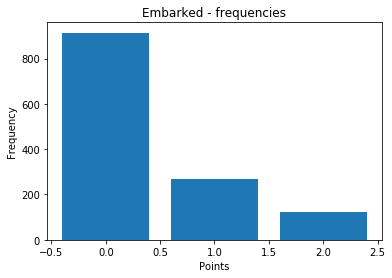

In [17]:
# Embarked
## Vamos a ver si alguno de los puertos de embarque tiene una frecuencia de uso mucho mayor que la de sus competidores
## de forma que podamos asignarlo a los valores vacíos.
fig, ax = plt.subplots() 
embarked_counts = data['Embarked'].value_counts() 
points = embarked_counts.index 
frequency = embarked_counts.values 
ax.bar(points, frequency) 
ax.set_title('Embarked - frequencies') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

Por lo tanto concluímos que es aceptable en éste caso en el que solo faltan 2 valores, rellenarlos con el embarcadero que hemos mapeado como "0", es decir, **S**, es decir, **Southampton**. Nosotros vamos a respetar lo mapeado y vamos a rellenar con 0.

In [18]:
data['Embarked'][np.isnan(data['Embarked'])] = 0
data['Embarked'] = data['Embarked'].astype(int)
# End (Embarked)

In [19]:
# Fare
data['Fare'][np.isnan(data['Fare'])] = data['Fare'].mean()

## BORRAR ##
"""
if fare_mem <= 7.91:
    data['Fare'][np.isnan(data['Fare'])] = 0
elif (fare_mem > 7.91) & (fare_mem <= 14.454):
    data['Fare'][np.isnan(data['Fare'])] = 1
elif (fare_mem > 14.454) & (fare_mem <= 31):
    data['Fare'][np.isnan(data['Fare'])] = 2
else:
    data['Fare'][np.isnan(data['Fare'])] = 3
"""

# End (Fare)

"\nif fare_mem <= 7.91:\n    data['Fare'][np.isnan(data['Fare'])] = 0\nelif (fare_mem > 7.91) & (fare_mem <= 14.454):\n    data['Fare'][np.isnan(data['Fare'])] = 1\nelif (fare_mem > 14.454) & (fare_mem <= 31):\n    data['Fare'][np.isnan(data['Fare'])] = 2\nelse:\n    data['Fare'][np.isnan(data['Fare'])] = 3\n"

In [20]:
# Survived
data['Survived'][np.isnan(data['Survived'])] = "Incógnita" 
# End (Survived)

In [21]:
# Titulo
data['Titulo'][np.isnan(data['Titulo'])] = 5 # Recordamos que equivale a ==> "Otros"
# End (Titulo)

In [22]:
# Comprobamos que no tengamos de valores perdidos.
data.isnull().sum()

Age               0
Embarked          0
Fare              0
PassengerId       0
Pclass            0
Sex               0
Survived          0
Con_Cabina        0
TamanioFamilia    0
Titulo            0
dtype: int64

Ahora que ya hemos comprobado que no tenemos valores nulos, vamos a convertir los mapeos que ya tenemos realizados en valores enteros:

In [23]:
# Casteamos
data['Titulo'] = data['Titulo'].astype(int)
data['Embarked'] = data['Embarked'].astype(int)
# Visualizamos que todo esté como lo esperado.
data.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Con_Cabina,TamanioFamilia,Titulo
0,22,0,7.2500,1,3,1,0,0,2,1
1,38,1,71.2833,2,1,0,1,1,2,3
2,26,0,7.9250,3,3,0,1,0,1,2
3,35,0,53.1000,4,1,0,1,1,2,3
4,35,0,8.0500,5,3,1,0,0,1,1


- Tratamiento de valores extremos.

Son observaciones que se desvían tanto del resto que levantan sospechas sobre si fueron generadas mediante el mismo mecanismo. Asimismo, estos valores pueden afectar de forma adversa los resultados de los análisis posteriores, al incrementar el error en la varianza de los datos y sesgar significativamente los cálculos y estimaciones.

Un valor *outlier* generalmente se considera que cuando un valor se encuentra alejado 3 desviaciones estándar con respecto a la media del conjunto. Debido a esto primero de todo vamos a utilizar Boxplots con las dimensiones interesantes para ello.

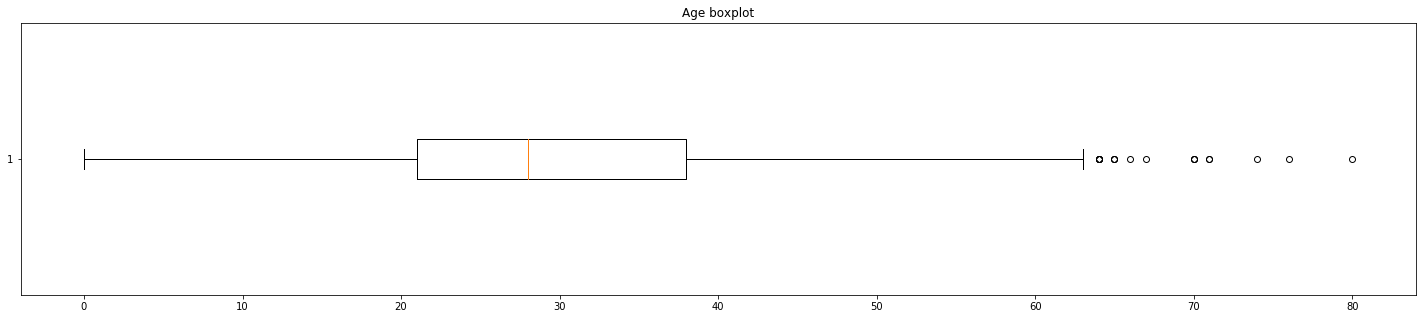

In [24]:
def boxplot_dimention(text):
    fig1, ax1 = plt.subplots()
    ax1.boxplot(data[text], vert=False)
    fig1.set_size_inches(25, 5)
    ax1.set_title(text + ' boxplot')
    
boxplot_dimention('Age')

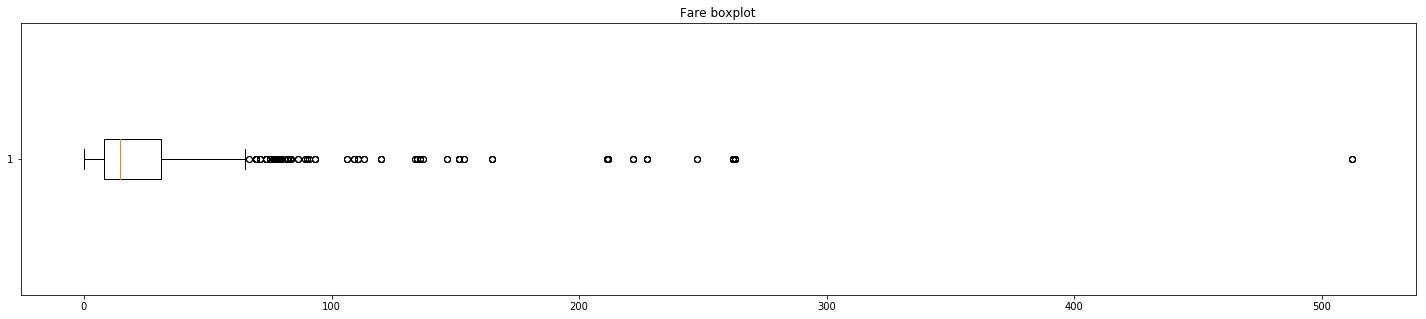

In [25]:
boxplot_dimention('Fare')

En el siguiente bucle vamos a mirar el número de elementos diferentes que tiene cada dimensión.

In [26]:
# Definimos una funicón que nos diga el número de elementos diferentes que tenemos por dimensión:
def elementos_diferentes(data):
    for col in data:
        print ("%d / %d: \t %s " % (data[col].drop_duplicates().shape[0], data[col].shape[0],col))

# Usamos la función
elementos_diferentes(data)

73 / 1309: 	 Age 
3 / 1309: 	 Embarked 
282 / 1309: 	 Fare 
1309 / 1309: 	 PassengerId 
3 / 1309: 	 Pclass 
2 / 1309: 	 Sex 
3 / 1309: 	 Survived 
2 / 1309: 	 Con_Cabina 
9 / 1309: 	 TamanioFamilia 
5 / 1309: 	 Titulo 


En conclusión sacamos que tenemos 2 vías para detectar outliers en el dataset con el que nos hemos quedado:

- Outliers en los boxplot
- Más tipos de datos que los mapeados (o discretizados) y que por tanto son valores fuera de los que se entienden como normales.

Empezando con el primero se puede llegar a la conclusión de que todo está bien dado que el valor más extremo en la dimensión de *Años* es 80, edad que puede haber tenido un pasajero del Titanic, y no hay números negativos por lo que todo está bien en ésta dimensión. En la dimensión *Fare* sí que vemos precios muy dispares, es por ello que tenemos que investigar si son correctos, o por el contrario son datos que hay que corregir:

In [27]:
train[(train['Fare'] > 200)].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


Como era de esperar, los pasajeros con mayor coste de billetes disponían de más de un camarote. Aunque puede ser interesante analizar los billetes con precios mayores a 500:

In [28]:
train[(train['Fare'] > 500)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Resulta sospechoso que a *Lesurer, Mr. Gustave J* le saliese tan caro el billete teniendo únicamente un camarote, y siendo el sirviente de Thomas Cardeza. Para comprobar que no es un valor falso hemos recurrido a comprobar el dato en un registro externo:

https://www.encyclopedia-titanica.org/titanic-survivor/gustave-lesueur.html#biography

De forma que parece que el registro es correcto, y por tanto no vamos a aplicar correcciones.

----

En lo referente al otro tipo de valores *outliers* a analizar, nos tenemos que fijar en:

3 / 1309: 	 Embarked 
3 / 1309: 	 Pclass 
2 / 1309: 	 Sex 
3 / 1309: 	 Survived 
2 / 1309: 	 Con_Cabina 
9 / 1309: 	 TamanioFamilia 
5 / 1309: 	 Titulo 

y comprobar que no hay más clases de las que hemos mapeado.

Embarked       -> 3/3
Pclass         -> 3/3
Sex            -> 2/2
Survived       -> 3/3 (1, 0, + "Incógnita")
Con_Cabina     -> 2/2
TamanioFamilia -> 5/5

Hemos comprobado que no hay valores sin mapear, y por tanto, no hay valores que no hayamos considerado, o *outliers*.

Una vez realizado éste proceso, mapeamos las dimensiones *Age* y *Fare* con la función que habíamos preparado previamente:

In [29]:
mapeo_Fare_Age()
data.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Con_Cabina,TamanioFamilia,Titulo
0,1,0,0,1,3,1,0,0,2,1
1,2,1,3,2,1,0,1,1,2,3
2,1,0,1,3,3,0,1,0,1,2
3,2,0,3,4,1,0,1,1,2,3
4,2,0,1,5,3,1,0,0,1,1


## Análisis de los datos.

## Representación de los resultados a partir de tablas y gráficas.

## Resolución del problema.

----

----

----

----

POSIBLE FALLO A DEPURAR:

- Que sean Mrs y que solo sean 1 en total en la familia.